## Práctica #2

**Profesor**: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

*Inspirado en el libro [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).*

**Objetivos**:
- Introducir la API de Keras a los estudiantes para la implementación de redes neuronales con Tensorflow.
- Implementar ideas básicas de una red neuronal mediante un ejemplo práctico de clasificación usando el dataset MNIST.
- Introducir métricas de evaluación, funciones de activación y funciones de pérdida.

**Instrucciones**: 
- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que todas las celdas en cuestión se encuentren ejecutadas para mostrar y evaluar sus resultados.
- Descargar su libro con terminación IPYNB y cargarlo en la actividad correspondiente en Brigthspace.

In [ ]:
print('El Mau')
print('Andres')
print('Andreiev')

El Mau
Andres
Andreiev


### Carga de librerías y conjunto de datos

In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En primer lugar, vamos a revisar las versiones de nuestras librerías principales.

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

Keras provee algunas funciones de utilidad para descargar y cargar conjuntos de datos comunes. En este caso, vamos a utilizar el dataset llamado MNIST. Vamos a cargarlo:

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

### Visualización de los datos

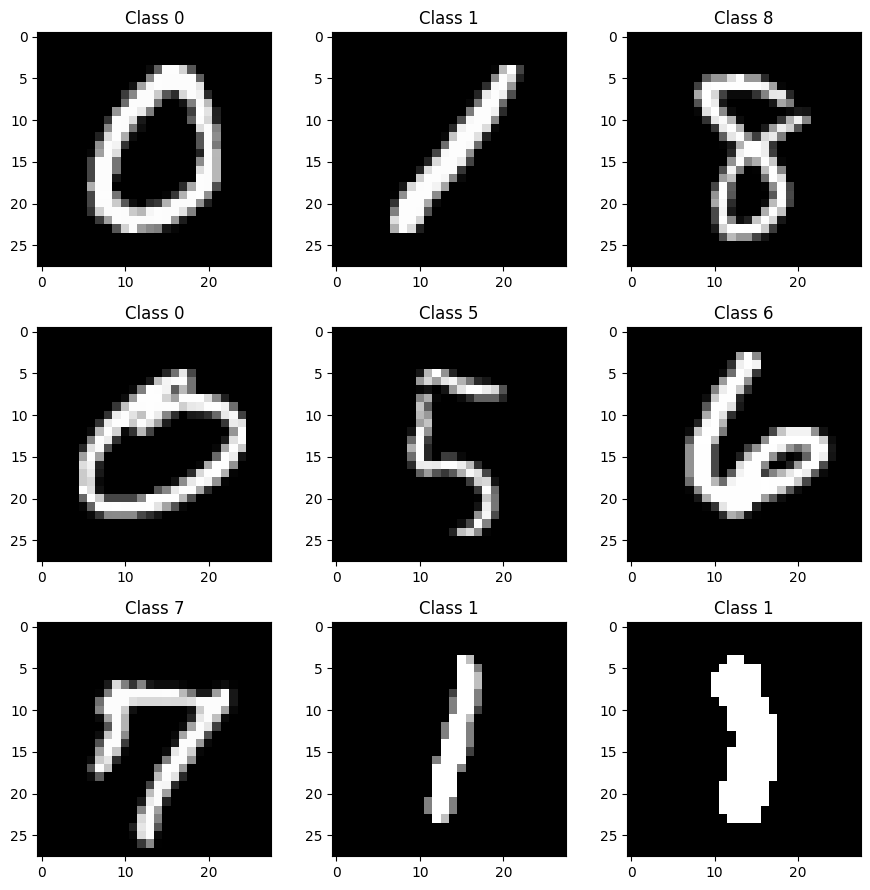

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

A diferencia de Scikit Learn, Keras representa las imágenes como un arreglo. En este caso, son imágenes de tamaño 28x28. Además, la intensidad de cada pixel se representa como enteros entre 0 y 255.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

### Preparando los datos para su entrenamiento

Se carga el dataset en las variables de entrenamiento y prueba. Además, vamos a considerar un conjunto de validación para evaluar finalmente la red neuronal. 

Por otro lado, debemos normalizar los valores de la matriz (que van de 0 a 255) para que solo sean valores entres 0 y 1. Por esto, dividimos entre 255. Con esto, adicionalmente, los valores pasan a ser de punto flotante.

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### Construcción y entrenamiento de la red neuronal

Vamos a construir el modelo de la red neuronal. Empecemos con un MLP con dos capas ocultas. La idea es la siguiente:

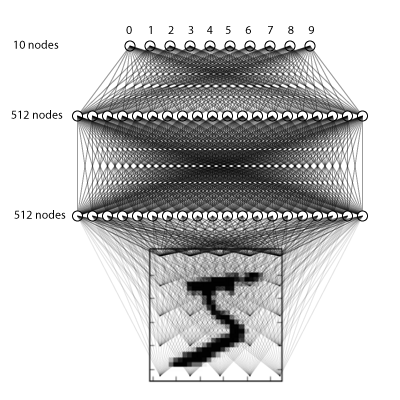

In [ ]:
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(512, kernel_initializer = 'he_normal')) # la capa densa compuesta por 512 neuronas
model.add(keras.layers.LeakyReLU(alpha=0.2))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu')) # segunda capa densa compuesta por 512 neuronas
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

Recuerden que la función ReLU se ve así:

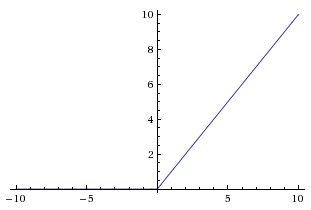

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Usualmente, los valores de los pesos iniciales se eligen de forma aleatoria y el valor del bias se inicializa en 0. Sin embargo, esto trae consigo ciertos problemas...

Después de crear el modelo, debemos compilarlo con el método `compile()`, el cual permite especificar la función de pérdida y el optimizador, además de otras métricas a calcular durante el entrenamiento y evaluación.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 6ms/step - loss: 0.2036 - accuracy: 0.9379 - val_loss: 0.0998 - val_accuracy: 0.9706
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0946 - accuracy: 0.9705 - val_loss: 0.1101 - val_accuracy: 0.9674
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9772 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.1163 - val_accuracy: 0.9722
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.1040 - val_accuracy: 0.9766
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9851 - val_loss: 0.1007 - val_accuracy: 0.9756
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.1102 - val_accuracy

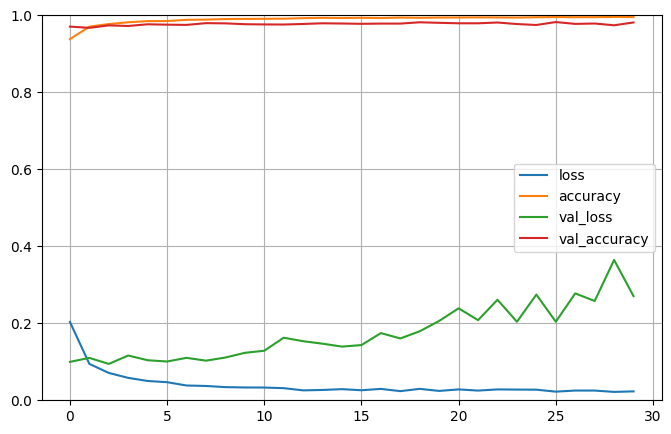

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

### Evaluación del modelo obtenido y predicciones para datos que no ha visto antes

Para realizar la evaluación final del modelo se utilizar el método `evaluate()` pasando como argumentos `X_test` y `y_test`.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.6784 - accuracy: 0.9806


[59.67836380004883, 0.9805999994277954]

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


¿Cómo se ve la predicción? Es un arreglo de (en este caso) 10 clases, donde a cada entrada se le asigna un valor de 'probabilidad'. Para determinar el valor final de la clase, se considera el más alto entre todos ellos.

In [ ]:
predictions[769]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[769])

6

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

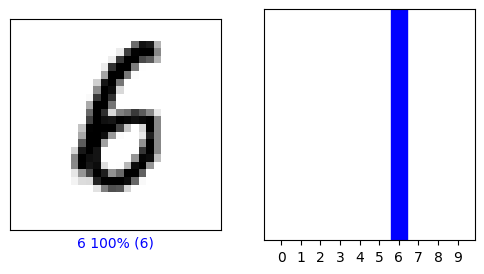

In [ ]:
i = 769
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### Guardar un modelo para después y cargarlo


La **mayoría** de los modelos de redes neuronales toman tiempo en entrenarse. ¿Qué sucede si un modelo tarda en entrenarse 1 semana o 1 mes? En esos casos, vamos a guardar nuestras redes neuronales entrenadas para cargarlas cuando sea necesario.

En este caso, utilizaremos el formato de archivo HDF5, que guarda tanto la arquitectura del modelo como los valores de todos los parámetros del modelo.

In [ ]:
model.save("keras_model.h5")

¿Y para cargarlo en otro momento? 

In [ ]:
other_model = keras.models.load_model('keras_model.h5')

¿Qué sucede si no obtengo un buen rendimiento? ¡Debemos tunear los parámetros¡


* El primer parámetro que debe uno revisar es la taza de aprendizaje del Gradiente. Entre más pequeña sea, más tarda en converger.
* La segunda opción es ajustar distintos **hiperparámetros** del modelo:
 * Número de capas
 * Número de neuronas por capa
 * Las funciones de activación
* Otra opción es ajustar el tamaño del batch (por default 32).



## Actividad 1

Implementar el early stopping como lo sugiere [tensorflow](https://keras.io/api/callbacks/early_stopping). Reentrenar el modelo y obtener la gráfica accuracy vs epochs correspondiente.

In [ ]:
#implementamos el modelo dado por la práctica
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(512, kernel_initializer = 'he_normal')) # la capa densa compuesta por 512 neuronas
model.add(keras.layers.LeakyReLU(alpha=0.2))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu')) # segunda capa densa compuesta por 512 neuronas
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
#se añade el callback del early stopping, con paciencia de dos epochs
#Monitoreamos val_loss y la condicion de paro es el numero de epochs
#los demás parámetros son los default
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#compilar el modelo (funcion de perdida y para optimizar y con que evaluar)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
#empezamos a ajustar ya con el callback
#ahora ponemos 100 epochs para ver como funciona el early stopping
#Tras implementar el early stopping tenemos que se frena en la epoch 34
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/100
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5585 - accuracy: 0.8570 - val_loss: 0.3000 - val_accuracy: 0.9162
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9183 - val_loss: 0.2374 - val_accuracy: 0.9356
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2368 - accuracy: 0.9329 - val_loss: 0.2048 - val_accuracy: 0.9430
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2057 - accuracy: 0.9417 - val_loss: 0.1839 - val_accuracy: 0.9492
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1814 - accuracy: 0.9482 - val_loss: 0.1661 - val_accuracy: 0.9540
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1631 - accuracy: 0.9539 - val_loss: 0.1537 - val_accuracy: 0.9606
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1475 - accuracy: 0.9579 - val_loss: 0.1403 - val_ac

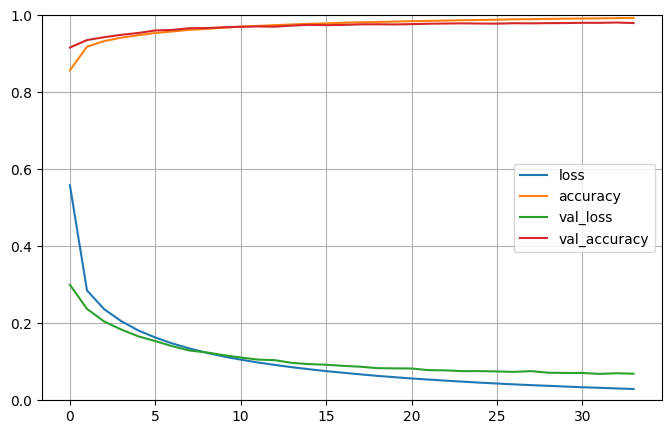

In [ ]:
#Se muestra el gráfico, se ve que se detiene en el epoch 34
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 11.1464 - accuracy: 0.9767


[11.146380424499512, 0.9767000079154968]

Se añade el early stopping y se revisa el parámetro val_loss. En este caso se hace el early stopping considerando el número de epochs. Se utiliza un parámetro de paciencia de dos. Es decir que si no hay mejora en el error tras dos epochs, se termina el entrenamiento del modelo. En este caso se puede observar de la gráfica y los resultados que el tope es en 34 epochs.

En este caso el loss es de 11.1464 y el accuracy es de 0.9767. 

## Actividad 2

**Práctica 2:** ¿Qué le pasa a nuestra métrica de evaluación (*accuracy*) si introducimos o modificamos algunos hiperparámetros de la red? Jueguen con el valor del Dropout, número de capas y/o número de neuronas por capa en la red neuronal. Para cada experimento, modificar el código anterior y obtener gráficas accuracy vs epochs correspondientes.

Primero Juguemos con el drop out, le quitamos lo comentado y lo ponemos con valor de 0.30

In [ ]:
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(512, kernel_initializer = 'he_normal')) # la capa densa compuesta por 512 neuronas
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation='relu')) # segunda capa densa compuesta por 512 neuronas
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2565 - accuracy: 0.9220 - val_loss: 0.1181 - val_accuracy: 0.9670
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9569 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1182 - accuracy: 0.9638 - val_loss: 0.0796 - val_accuracy: 0.9788
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9679 - val_loss: 0.0839 - val_accuracy: 0.9778
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0969 - accuracy: 0.9706 - val_loss: 0.0917 - val_accuracy: 0.9772
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9746 - val_loss: 0.0787 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 45.7489 - accuracy: 0.9798


[45.74892044067383, 0.9797999858856201]

El accuracy del modelo original implementado en clase es de 0.9806 ahora al implementar el dropout el accuracy es de 0.9798, un pequeño decremento. El los del original es de 59.6784 ahora es de 45.7489. Disminuye el error. 

el Dropout nos permite optimizar el accuracy y disminuir el error.

Ahora añadimos dos capas ocultas más de 512 neuronas al modelo original, con funcion de activaciñon tanh y sigmoide y eliminando el dropout

In [ ]:
#implementamos el modelo dado por la práctica
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(512, kernel_initializer = 'he_normal')) # la capa densa compuesta por 512 neuronas
model.add(keras.layers.LeakyReLU(alpha=0.2))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu')) # segunda capa densa compuesta por 512 neuronas
model.add(keras.layers.Dense(512, activation='tanh')) # tercera capa densa compuesta por 512 neuronas y tanh
model.add(keras.layers.Dense(512, activation='sigmoid')) # cuarta capa densa compuesta por 512 neuronas y sigmoide
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.2341 - accuracy: 0.9298 - val_loss: 0.1387 - val_accuracy: 0.9600
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1107 - accuracy: 0.9668 - val_loss: 0.1003 - val_accuracy: 0.9690
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0835 - accuracy: 0.9746 - val_loss: 0.0982 - val_accuracy: 0.9722
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0659 - accuracy: 0.9789 - val_loss: 0.0890 - val_accuracy: 0.9746
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0875 - val_accuracy: 0.9744
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0680 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9747


[0.1114073395729065, 0.9746999740600586]

Del modelo original: loss: 59.6784 - accuracy: 0.9806

Ahora obtenemos: loss: 0.1114 - accuracy: 0.9747

El loss o error disminuye muchisimo a comparacion del modelo original, mientras que el accuracy tambien disminuye un poco. Podemos estar haciendo algo de sobreajuste aqui

Ahora al modelo original se le cambia el numero de neuronas en las capas ocultas a 64 y 128

In [ ]:
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(64, kernel_initializer = 'he_normal')) # la capa densa compuesta por 64 neuronas
model.add(keras.layers.LeakyReLU(alpha=0.2))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu')) # segunda capa densa compuesta por 128 neuronas
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.2826 - accuracy: 0.9176 - val_loss: 0.1634 - val_accuracy: 0.9560
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9601 - val_loss: 0.1121 - val_accuracy: 0.9654
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.0905 - val_accuracy: 0.9738
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0933 - val_accuracy: 0.9704
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9811 - val_loss: 0.0771 - val_accuracy: 0.9756
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0855 - val_accuracy: 0.9758
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0821 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 41.4141 - accuracy: 0.9758


[41.4140739440918, 0.9757999777793884]

Del modelo original: loss: 59.6784 - accuracy: 0.9806

De este modelo: loss: 41.4141 - accuracy: 0.9758

El loss disminuye un poco y el accuracy también disminuye un poco